### Supermarket Sales Analysis

#### Introduction
The purpose of this analysis is to explore supermarket sales data in order to identify patterns, customer behaviors, and performance drivers.  
This notebook will help provide actionable business insights that can support decision-making.  

#### Objectives
- Identify the top-performing product lines.  
- Analyze sales trends over time.   
- Examine payment methods and their popularity.   

#### Workflow
1. Import and preview the dataset.  
2. Data cleaning and preparation.  
3. Exploratory Data Analysis (EDA) with visualizations.  


In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [288]:
# Loading dataset
df = pd.read_csv("Capstone_Supermarket Sales.csv")
df

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,A,1,0,0,Normal,Male,Health and beauty,74.69,7,26.1415,NaN,05-01-19,13:08,Ewallet,9.1
1,226-31-3081,C,0,1,0,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,08-03-19,10:29,Cash,9.6
2,631-41-3108,A,1,0,0,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-19,13:23,Credit card,7.4
3,123-19-1176,A,1,0,0,Normal,Male,Health and beauty,58.22,8,NaN,489.0480,27-01-19,8 - 30 PM,Ewallet,8.4
4,373-73-7910,A,1,0,0,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,08-02-19,10:37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,861-77-0145,C,0,1,0,Member,Male,Electronic accessories,81.97,10,40.9850,860.6850,03-03-19,14:30,Cash,9.2
1002,479-26-8945,B,0,0,1,Member,Female,Sports and travel,16.49,2,1.6490,34.6290,05-02-19,11:32,Ewallet,4.6
1003,210-67-5886,C,0,1,0,Member,Female,Health and beauty,98.21,3,14.7315,309.3615,05-02-19,10:41,Credit card,7.8
1004,227-78-1148,B,0,0,1,Normal,Female,Fashion accessories,72.84,7,25.4940,535.3740,15-02-19,12:44,Cash,8.4


In [290]:
# getting info about the data (data profiling)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1006 non-null   object 
 1   Branch         1006 non-null   object 
 2   Yangon         1006 non-null   int64  
 3   Naypyitaw      1006 non-null   int64  
 4   Mandalay       1006 non-null   int64  
 5   Customer type  1006 non-null   object 
 6   Gender         1006 non-null   object 
 7   Product line   1006 non-null   object 
 8   Unit price     1006 non-null   object 
 9   Quantity       1006 non-null   int64  
 10  Tax 5%         997 non-null    float64
 11  Total          1003 non-null   float64
 12  Date           1006 non-null   object 
 13  Time           1006 non-null   object 
 14  Payment        1006 non-null   object 
 15  Rating         1006 non-null   float64
dtypes: float64(3), int64(4), object(9)
memory usage: 125.9+ KB


In [292]:
# checking null values
df.isnull().sum()

Invoice ID       0
Branch           0
Yangon           0
Naypyitaw        0
Mandalay         0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           9
Total            3
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

### Data cleaning

In [296]:
df['Customer type'] = df['Customer type'].replace('Memberr', 'Member')


In [298]:
df['Branch'] = df[['Yangon','Naypyitaw','Mandalay']].idxmax(axis=1)

df.drop(['Yangon','Naypyitaw','Mandalay'], axis=1, inplace=True)
df

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,Yangon,Normal,Male,Health and beauty,74.69,7,26.1415,NaN,05-01-19,13:08,Ewallet,9.1
1,226-31-3081,Naypyitaw,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,08-03-19,10:29,Cash,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-19,13:23,Credit card,7.4
3,123-19-1176,Yangon,Normal,Male,Health and beauty,58.22,8,NaN,489.0480,27-01-19,8 - 30 PM,Ewallet,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,08-02-19,10:37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,861-77-0145,Naypyitaw,Member,Male,Electronic accessories,81.97,10,40.9850,860.6850,03-03-19,14:30,Cash,9.2
1002,479-26-8945,Mandalay,Member,Female,Sports and travel,16.49,2,1.6490,34.6290,05-02-19,11:32,Ewallet,4.6
1003,210-67-5886,Naypyitaw,Member,Female,Health and beauty,98.21,3,14.7315,309.3615,05-02-19,10:41,Credit card,7.8
1004,227-78-1148,Mandalay,Normal,Female,Fashion accessories,72.84,7,25.4940,535.3740,15-02-19,12:44,Cash,8.4


In [300]:
# Reviewing the top 100 records for "unit price" column
df['Unit price'].head(100)

0         74.69
1         15.28
2         46.33
3         58.22
4         86.31
        ...    
95        97.16
96        87.87
97    12.45 USD
98        52.75
99         82.7
Name: Unit price, Length: 100, dtype: object

In [302]:
df['Unit price'] = df['Unit price'].str.replace(r'\s*USD\s*', '', regex=True, case=False)
df['Unit price'].head(100)

0     74.69
1     15.28
2     46.33
3     58.22
4     86.31
      ...  
95    97.16
96    87.87
97    12.45
98    52.75
99     82.7
Name: Unit price, Length: 100, dtype: object

In [304]:
# changing the datatype to float
df['Unit price'] = pd.to_numeric(df['Unit price'], errors='coerce')

In [306]:
df['Unit price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1006 entries, 0 to 1005
Series name: Unit price
Non-Null Count  Dtype  
--------------  -----  
1006 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


In [308]:
# filling the "NaN" values in "Tax 5%" column
df['Tax 5%'] = df['Unit price'] * df['Quantity'] * 0.05

In [310]:
# filling the "NaN" values in "Total" column
df['Total'] = df['Unit price'] * df['Quantity'] + df['Tax 5%']
df

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,Yangon,Normal,Male,Health and beauty,74.69,7,26.1415,548.9715,05-01-19,13:08,Ewallet,9.1
1,226-31-3081,Naypyitaw,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,08-03-19,10:29,Cash,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-19,13:23,Credit card,7.4
3,123-19-1176,Yangon,Normal,Male,Health and beauty,58.22,8,23.2880,489.0480,27-01-19,8 - 30 PM,Ewallet,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,08-02-19,10:37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,861-77-0145,Naypyitaw,Member,Male,Electronic accessories,81.97,10,40.9850,860.6850,03-03-19,14:30,Cash,9.2
1002,479-26-8945,Mandalay,Member,Female,Sports and travel,16.49,2,1.6490,34.6290,05-02-19,11:32,Ewallet,4.6
1003,210-67-5886,Naypyitaw,Member,Female,Health and beauty,98.21,3,14.7315,309.3615,05-02-19,10:41,Credit card,7.8
1004,227-78-1148,Mandalay,Normal,Female,Fashion accessories,72.84,7,25.4940,535.3740,15-02-19,12:44,Cash,8.4


In [312]:
# checking if there are null values
df.isnull().sum()

Invoice ID       0
Branch           0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

In [316]:
# changing the datatype of the "date" column
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice ID     1006 non-null   object        
 1   Branch         1006 non-null   object        
 2   Customer type  1006 non-null   object        
 3   Gender         1006 non-null   object        
 4   Product line   1006 non-null   object        
 5   Unit price     1006 non-null   float64       
 6   Quantity       1006 non-null   int64         
 7   Tax 5%         1006 non-null   float64       
 8   Total          1006 non-null   float64       
 9   Date           1006 non-null   datetime64[ns]
 10  Time           1006 non-null   object        
 11  Payment        1006 non-null   object        
 12  Rating         1006 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 102.3+ KB


In [320]:
df

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,Yangon,Normal,Male,Health and beauty,74.69,7,26.1415,548.9715,2019-05-01,13:08,Ewallet,9.1
1,226-31-3081,Naypyitaw,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,2019-08-03,10:29,Cash,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,7.4
3,123-19-1176,Yangon,Normal,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,8 - 30 PM,Ewallet,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-08-02,10:37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,861-77-0145,Naypyitaw,Member,Male,Electronic accessories,81.97,10,40.9850,860.6850,2019-03-03,14:30,Cash,9.2
1002,479-26-8945,Mandalay,Member,Female,Sports and travel,16.49,2,1.6490,34.6290,2019-05-02,11:32,Ewallet,4.6
1003,210-67-5886,Naypyitaw,Member,Female,Health and beauty,98.21,3,14.7315,309.3615,2019-05-02,10:41,Credit card,7.8
1004,227-78-1148,Mandalay,Normal,Female,Fashion accessories,72.84,7,25.4940,535.3740,2019-02-15,12:44,Cash,8.4


In [322]:
# showing the first top 50 rows in "time" column
df['Time'].head(50)

0         13:08
1         10:29
2         13:23
3     8 - 30 PM
4         10:37
5         18:30
6         14:36
7         11:38
8         17:15
9         13:27
10        18:07
11        17:03
12        10:25
13        16:48
14        19:21
15        16:19
16        11:03
17        10:39
18        18:00
19        15:30
20        11:24
21        10:40
22        12:20
23        11:15
24        17:36
25        19:20
26        15:31
27        12:17
28        19:48
29        15:36
30        19:39
31        12:43
32        14:49
33        10:12
34        10:42
35        12:28
36        19:15
37        17:17
38        13:24
39        13:01
40        18:45
41        10:11
42        13:03
43        20:39
44        19:47
45        18:00
46        17:24
47        15:47
48        12:45
49        17:08
Name: Time, dtype: object

In [324]:
df['Time'].tail(20)

986     14:42
987     19:08
988     19:12
989     15:46
990     19:06
991     18:10
992     20:46
993     18:35
994     11:40
995     13:46
996     17:16
997     13:22
998     15:33
999     13:28
1000    10:43
1001    14:30
1002    11:32
1003    10:41
1004    12:44
1005    20:07
Name: Time, dtype: object

In [326]:
# replacing value to match the time format

df['Time'] = df['Time'].replace('8 - 30 PM', '8:30')
df

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,Yangon,Normal,Male,Health and beauty,74.69,7,26.1415,548.9715,2019-05-01,13:08,Ewallet,9.1
1,226-31-3081,Naypyitaw,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,2019-08-03,10:29,Cash,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,7.4
3,123-19-1176,Yangon,Normal,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,8:30,Ewallet,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-08-02,10:37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,861-77-0145,Naypyitaw,Member,Male,Electronic accessories,81.97,10,40.9850,860.6850,2019-03-03,14:30,Cash,9.2
1002,479-26-8945,Mandalay,Member,Female,Sports and travel,16.49,2,1.6490,34.6290,2019-05-02,11:32,Ewallet,4.6
1003,210-67-5886,Naypyitaw,Member,Female,Health and beauty,98.21,3,14.7315,309.3615,2019-05-02,10:41,Credit card,7.8
1004,227-78-1148,Mandalay,Normal,Female,Fashion accessories,72.84,7,25.4940,535.3740,2019-02-15,12:44,Cash,8.4


## Visualization

In [330]:
df['Product line'].unique()


array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [332]:
len(df['Product line'].unique())

6

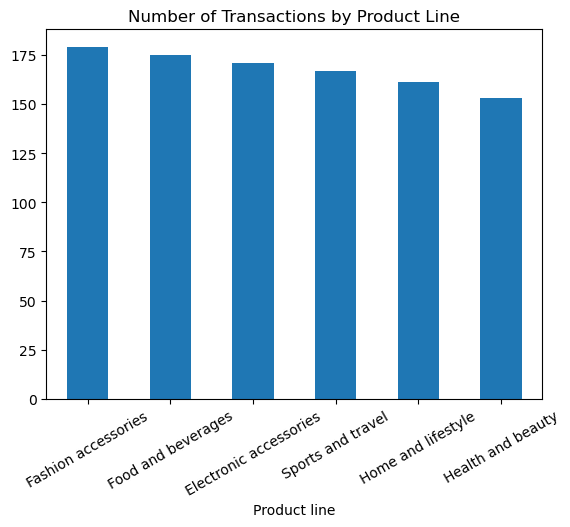

In [334]:
## showing the number of Transactions by Product

df['Product line'].value_counts().plot(kind='bar')
plt.title('Number of Transactions by Product Line')
plt.xticks(rotation=30)
plt.show()

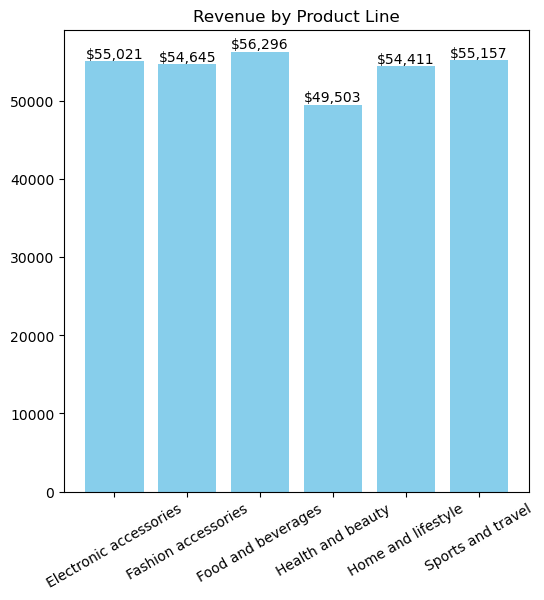

In [336]:
# sum revenue per product line
rev_by_product = df.groupby('Product line')['Total'].sum()


plt.figure(figsize=(6,6))
bars = plt.bar(rev_by_product.index, rev_by_product, color='skyblue')

#show data lable
for bar in bars:
    y_value = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, y_value, f'${y_value:,.0f}', 
             ha='center', va='bottom')

plt.title('Revenue by Product Line')
plt.xticks(rotation=30)
plt.show()


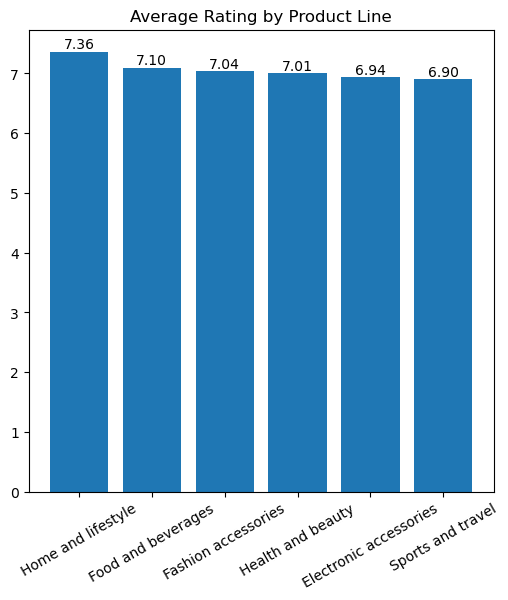

In [337]:
# calcutating AVG rating per product
avg_rating = df.groupby('Product line')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,6))
bars = plt.bar(avg_rating.index, avg_rating)

#show data lable
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', 
             ha='center', va='bottom', fontsize=10)

plt.title('Average Rating by Product Line')
plt.xticks(rotation=30)
plt.show()

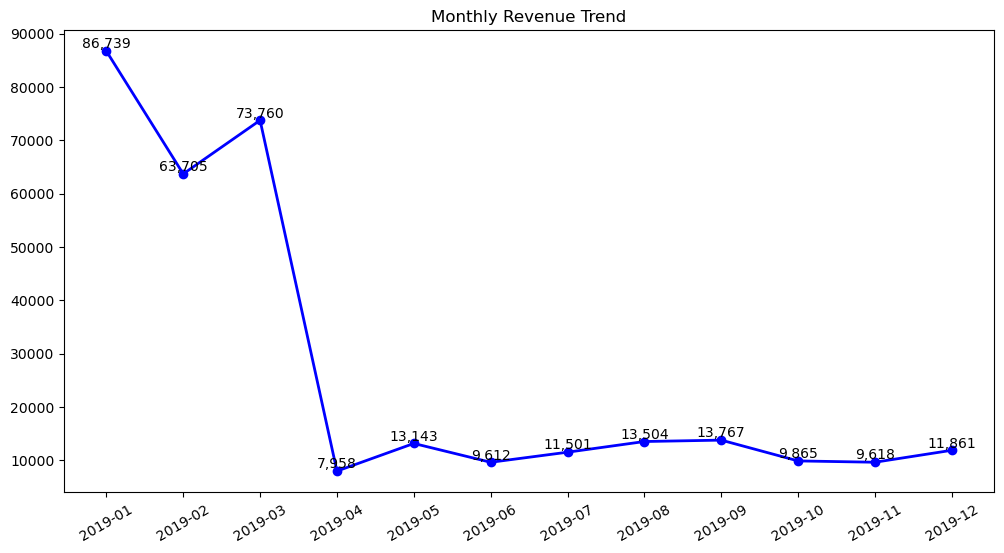

In [340]:

# extract month from the date 
df['Month'] = df['Date'].dt.to_period('M')

# Sum monthly revenue
monthly_revenue = df.groupby('Month')['Total'].sum()

plt.figure(figsize=(12,6))
plt.plot(monthly_revenue.index.astype(str), monthly_revenue.values, 
         marker='o', color='blue', linewidth=2)


plt.title("Monthly Revenue Trend")

# show data label
for i, val in enumerate(monthly_revenue.values):
    plt.text(i, val, f'{val:,.0f}', ha='center', va='bottom')

plt.xticks(rotation=30)
plt.show()


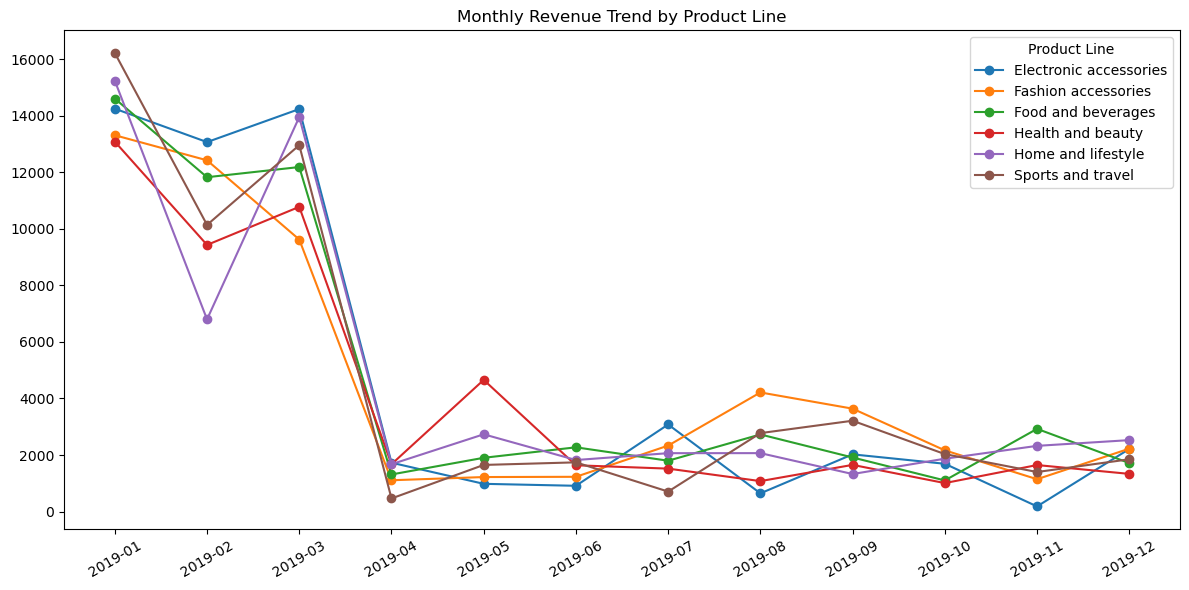

In [341]:
# extract month from the date 
df['Month'] = df['Date'].dt.to_period('M')

# sum monthly revenue for each Product line
monthly_revenue = df.groupby(['Month', 'Product line'])['Total'].sum().unstack()

plt.figure(figsize=(12,6))
for col in monthly_revenue.columns:
    plt.plot(monthly_revenue.index.astype(str), monthly_revenue[col], marker='o', label=col)

plt.title("Monthly Revenue Trend by Product Line")

plt.legend(title="Product Line")

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [344]:
len(df['Payment'].unique())

3

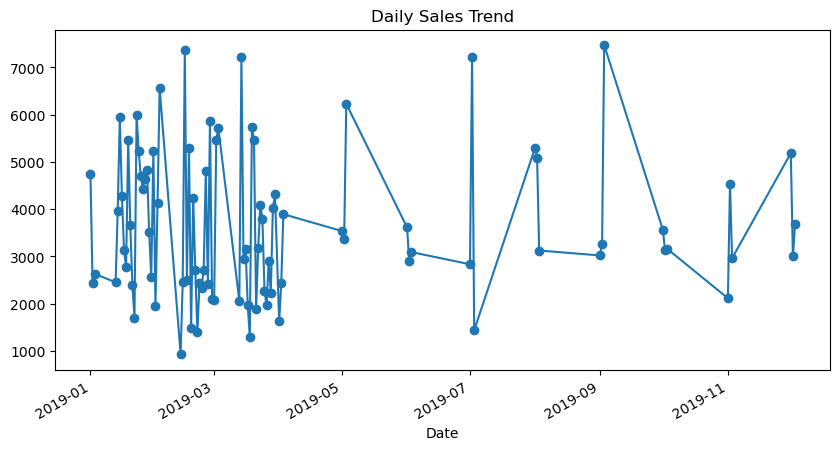

In [346]:
daily_sales = df.groupby('Date')['Total'].sum()

# trend line
daily_sales.plot(kind='line', figsize=(10,5), marker='o', title="Daily Sales Trend")

plt.show()

In [348]:
len(df['Customer type'].unique())

3

In [350]:
df['Customer type'].unique()

array(['Normal', '-', 'Member'], dtype=object)

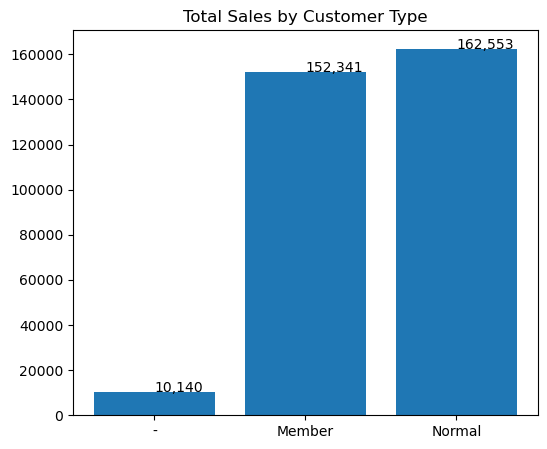

In [352]:
customer_sales = df.groupby('Customer type')['Total'].sum()

plt.figure(figsize=(6,5))
bars = plt.bar(customer_sales.index, customer_sales)

for bar in bars:
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, y, f'{y:,.0f}')

plt.title("Total Sales by Customer Type")
plt.show()

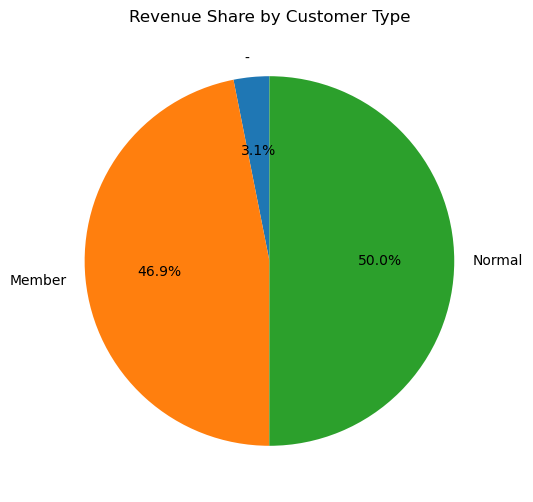

In [354]:
customer_sales = df.groupby('Customer type')['Total'].sum()

customer_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), startangle=90)
plt.title("Revenue Share by Customer Type")
plt.ylabel("") 
plt.show()

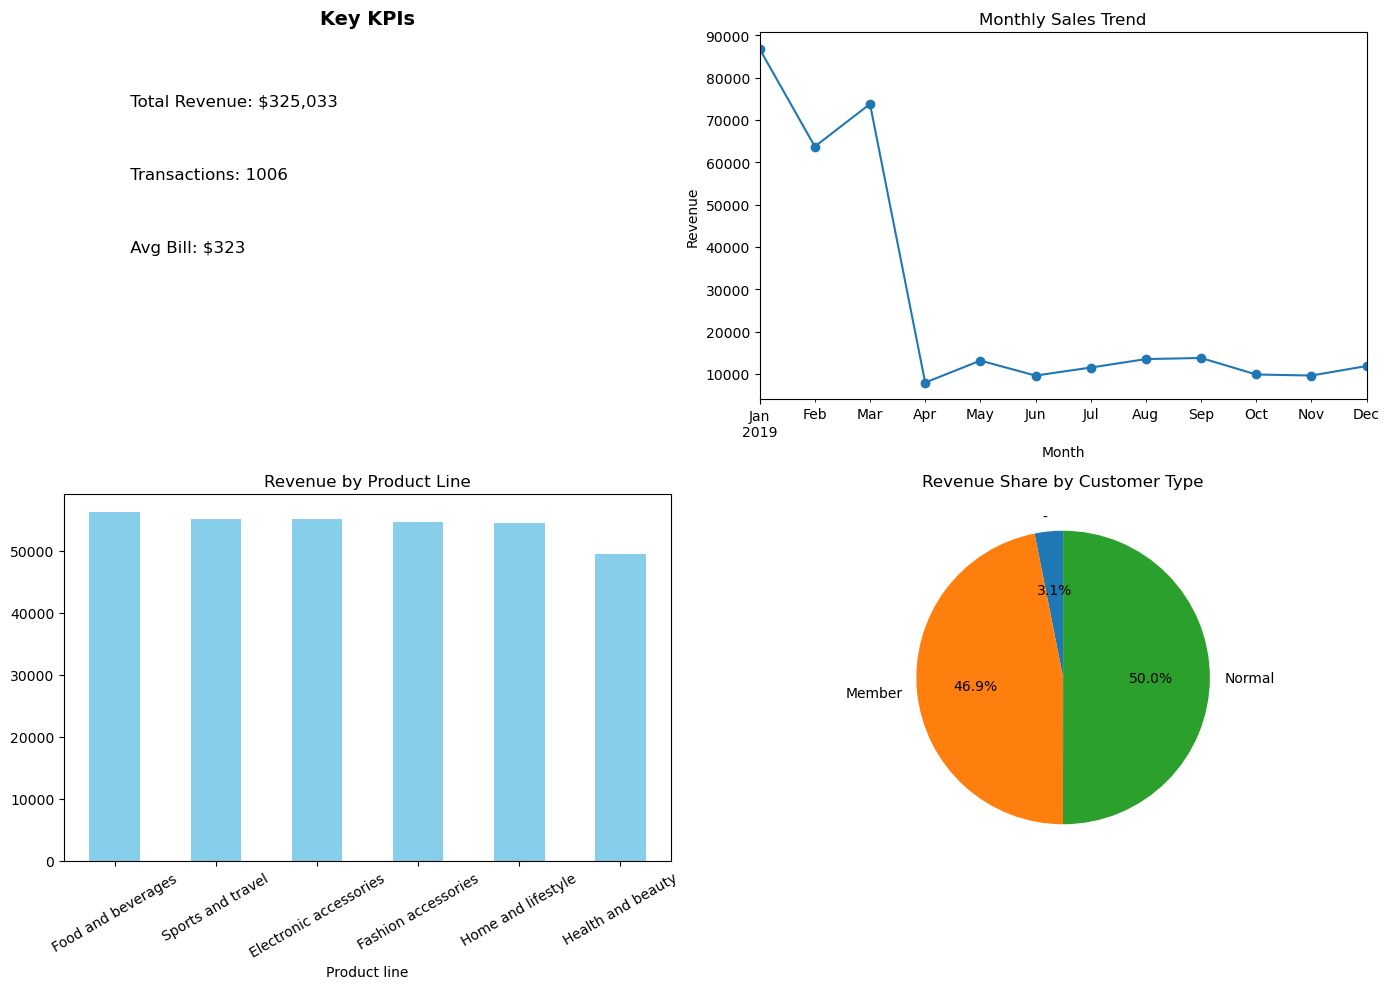

In [362]:
# --- KPIs ---
total_revenue = df['Total'].sum()
transactions = df.shape[0]
avg_bill = df['Total'].mean()

# --- Monthly Sales ---
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total'].sum()

# --- Revenue by Product Line ---
product_sales = df.groupby('Product line')['Total'].sum().sort_values(ascending=False)

# --- Revenue Share by Customer Type ---
customer_sales = df.groupby('Customer type')['Total'].sum()

# ---------------- Dashboard ----------------
plt.figure(figsize=(14,10))

# 1. KPI Cards 
plt.subplot(2,2,1)
plt.axis("off")
plt.text(0.1, 0.8, f" Total Revenue: ${total_revenue:,.0f}", fontsize=12)
plt.text(0.1, 0.6, f" Transactions: {transactions}", fontsize=12)
plt.text(0.1, 0.4, f" Avg Bill: ${avg_bill:,.0f}", fontsize=12)
plt.title("Key KPIs", fontsize=14, fontweight='bold')

# 2. Line Chart: Monthly Sales
plt.subplot(2,2,2)
monthly_sales.plot(kind='line', marker='o')

plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")

# 3. Bar Chart: Revenue by Product Line
plt.subplot(2,2,3)
product_sales.plot(kind='bar', color="skyblue")
plt.title("Revenue by Product Line")

plt.xticks(rotation=30)

# 4. Pie Chart: Revenue Share by Customer Type
plt.subplot(2,2,4)
customer_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Revenue Share by Customer Type")
plt.ylabel("")

plt.tight_layout()
plt.show()

In [379]:
from IPython.display import FileLink

filename = "Capstone_Supermarket Sales.csv"
df.to_csv(filename, index=False)

FileLink(filename)



C:\Users\el manar\Capstone_Supermarket Sales.csv